In [14]:
import numpy as np
import cv2 as cv
import glob
import numpy as np
import cv2, PIL, os
from cv2 import aruco
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((14*9,3), np.float32)
objp[:,:2] = np.mgrid[0:14,0:9].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob("./calibration/GT_calib2/"+'*.png')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

./calibration/metalens_capture/2.png


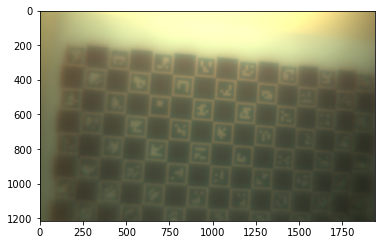

In [3]:
datadir = "./calibration/metalens_capture/"
images = sorted(glob.glob("./calibration/metalens_capture/"+'*.png'))
#mages = np.array([datadir + f for f in os.listdir(datadir) if f.endswith(".png") ])
#rder = np.argsort([int(p.split(".")[-2].split("_")[-1]) for p in images])
#images = images[order]
print(images[4])
#im = PIL.Image.open(images[4])
im = plt.imread(images[4])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(im)
#ax.axis('off')
plt.show()

In [4]:
img_pts = [(261,329),(397,342),(519,350),(646,362),(770,373),(894,383),(1016,394),(1137,405),(1256,416),(1373,427),(1489,438),(1604,448),(1710,457),(1818,470),
(247,454),(381,466),(507,476),(633,487),(760,497),(883,506),(1008,518),(1130,527),(1249,538),(1367,548),(1483,557),(1596,568),(1705,575),(1812,588),
(237,586),(370,593),(500,603),(624,612),(752,623),(876,633),(1000,641),(1122,651),(1242,660),(1359,669),(1479,679),(1589,689),(1700,693),(1805,701),
(227,712),(360,721),(487,731),(617,740),(741,749),(869,759),(992,766),(1113,778),(1234,783),(1353,791),(1472,799),(1583,807),(1695,814),(1802,815),
(223,840),(351,846),(480,858),(608,864),(734,876),(860,883),(984,892),(1106,899),(1226,906),(1345,913),(1462,919),(1575,926),(1685,925),(1800,932),
(206,966),(346,975),(472,986),(600,995),(726,1003),(852,1011),(974,1019),(1098,1023),(1219,1031),(1338,1035),(1453,1041),(1568,1045),(1679,1048),(1791,1053),
(208,1098),(336,1104),(466,1112),(589,1122),(718,1127),(842,1134),(967,1142),(1090,1147),(1210,1151),(1328,1158),(1443,1162),(1560,1166),(1667,1162),(1772,1166)]

In [1]:
deconv_pts_y = [103,228,346,470,592,711,831,951,1070,1190,1307,1426,1536,1664]
deconv_pts_x = [171,289,409,526,647,764,886,1006,1126]
def construct_corner_pts(deconv_pts_x,deconv_pts_y):
    corners_np = np.zeros((len(deconv_pts_x)*len(deconv_pts_x),1,2))
    for i in range(len(deconv_pts_x)):
        for j in range(len(deconv_pts_y)):
            corners_np[i*len(deconv_pts_x)+j,0,0] = deconv_pts_x[i]
            corners_np[i*len(deconv_pts_x)+j,0,1] = deconv_pts_y[j]
    return corners_np



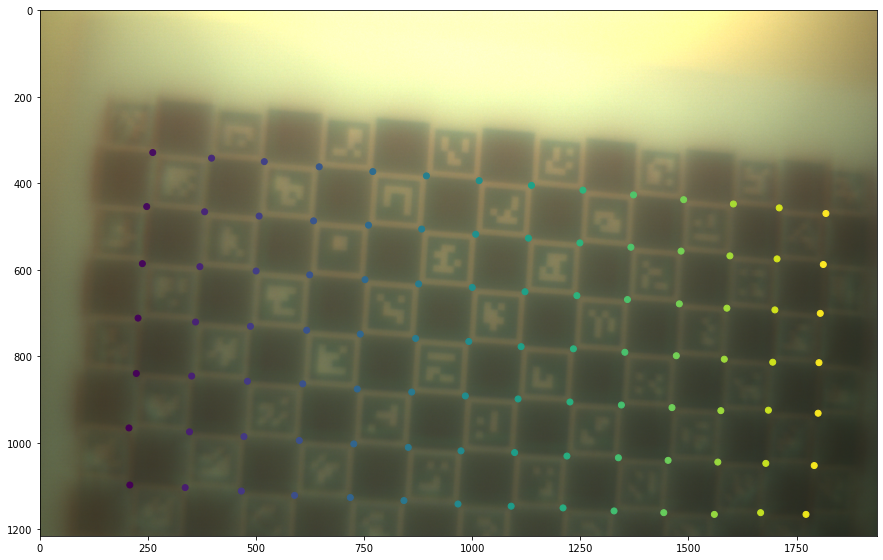

In [5]:
fig = plt.figure(figsize=(15,15))
#ax = fig.add_subplot(1,1,1)
plt.imshow(im)
#ax.axis('off')
#plt.show()
x_points = []
y_points = []
for pt in img_pts:
   x_points.append(pt[0])
   y_points.append(pt[1])
plt.scatter(x_points, y_points, c=x_points)
plt.show()

In [6]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
x = 14
y = 7
objp = np.zeros((x*y,3), np.float32)
imgp = np.zeros((x*y,2), np.float32)
objp[:,:2] = np.mgrid[0:x,0:y].T.reshape(-1,2)
objp *= 76
for i in range(0,x*y):
    imgp[i,0]=img_pts[i][0]
    imgp[i,1]=img_pts[i][1]
print(imgp.shape)

(98, 2)


In [10]:
frame_shape = im[...,0].shape[::-1]
objpoints = []
imgpoints = []
imgpoints.append(imgp)
objpoints.append(objp)

ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, frame_shape, None, None)

In [11]:
print(mtx)
print(dist)

img = cv.imread(images[3])
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
print(roi)

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
#dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

[[5.18460289e+03 0.00000000e+00 8.93439037e+02]
 [0.00000000e+00 4.99241883e+03 1.87367393e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-3.02398281e-01 -4.96879202e+00  3.38606915e-02  5.99562903e-03
   1.22428270e+01]]
(20, 11, 1891, 1178)


True

In [20]:
corners2 = np.array([
[ 1673 , 1124 ],
[ 1554 , 1127 ],
[ 1432 , 1126 ],
[ 1312 , 1125 ],
[ 1191 , 1130 ],
[ 1075 , 1134 ],
[ 954 , 1134 ],
[ 835 , 1136 ],
[ 710 , 1136 ],
[ 593 , 1140 ],
[ 471 , 1138 ],
[ 350 , 1143 ],
[ 231 , 1142 ],
[ 102 , 1144 ],
[ 1668 , 1002 ],
[ 1554 , 1005 ],
[ 1432 , 1005 ],
[ 1313 , 1005 ],
[ 1195 , 1007 ],
[ 1073 , 1007 ],
[ 956 , 1013 ],
[ 832 , 1011 ],
[ 716 , 1016 ],
[ 595 , 1017 ],
[ 471 , 1016 ],
[ 348 , 1014 ],
[ 232 , 1019 ],
[ 105 , 1021 ],
[ 1665 , 881 ],
[ 1551 , 884 ],
[ 1432 , 887 ],
[ 1312 , 886 ],
[ 1193 , 888 ],
[ 1075 , 891 ],
[ 956 , 891 ],
[ 834 , 892 ],
[ 713 , 893 ],
[ 595 , 895 ],
[ 471 , 894 ],
[ 352 , 896 ],
[ 230 , 899 ],
[ 113 , 900 ],
[ 1668 , 763 ],
[ 1548 , 762 ],
[ 1432 , 766 ],
[ 1311 , 765 ],
[ 1192 , 768 ],
[ 1072 , 770 ],
[ 955 , 772 ],
[ 833 , 771 ],
[ 713 , 771 ],
[ 592 , 774 ],
[ 472 , 774 ],
[ 348 , 774 ],
[ 230 , 776 ],
[ 110 , 777 ],
[ 1663 , 644 ],
[ 1549 , 647 ],
[ 1428 , 646 ],
[ 1311 , 649 ],
[ 1192 , 649 ],
[ 1072 , 650 ],
[ 954 , 649 ],
[ 833 , 653 ],
[ 712 , 652 ],
[ 593 , 654 ],
[ 468 , 654 ],
[ 352 , 653 ],
[ 229 , 656 ],
[ 115 , 655 ],
[ 1662 , 529 ],
[ 1545 , 531 ],
[ 1430 , 529 ],
[ 1310 , 531 ],
[ 1193 , 531 ],
[ 1073 , 529 ],
[ 953 , 531 ],
[ 833 , 532 ],
[ 713 , 532 ],
[ 591 , 534 ],
[ 470 , 531 ],
[ 351 , 535 ],
[ 228 , 531 ],
[ 111 , 537 ],
[ 1658 , 412 ],
[ 1544 , 413 ],
[ 1426 , 412 ],
[ 1310 , 411 ],
[ 1192 , 413 ],
[ 1071 , 409 ],
[ 952 , 412 ],
[ 833 , 412 ],
[ 713 , 416 ],
[ 592 , 413 ],
[ 472 , 415 ],
[ 352 , 415 ],
[ 234 , 415 ],
[ 115 , 416 ],
[ 1657 , 297 ],
[ 1539 , 297 ],
[ 1427 , 295 ],
[ 1308 , 293 ],
[ 1190 , 292 ],
[ 1068 , 292 ],
[ 950 , 293 ],
[ 833 , 293 ],
[ 712 , 292 ],
[ 593 , 294 ],
[ 473 , 295 ],
[ 353 , 297 ],
[ 233 , 297 ],
[ 114 , 298 ],
[ 1656 , 178 ],
[ 1539 , 180 ],
[ 1422 , 177 ],
[ 1308 , 178 ],
[ 1185 , 175 ],
[ 1069 , 176 ],
[ 951 , 179 ],
[ 833 , 176 ],
[ 713 , 177 ],
[ 593 , 176 ],
[ 475 , 180 ],
[ 353 , 179 ],
[ 234 , 183 ],
[ 116 , 180 ]
])

img_gt = plt.imread('./new_dist_gt.png')
img_gt = np.uint8(img_gt*255)
ret1, corners1 = cv2.findChessboardCorners(img_gt, (14,9))
print(corners1)

H, _ = cv.findHomography(corners1[:,0,:], corners2)
print(H)


[[[1111.1179    851.76306 ]]

 [[1036.4968    852.8264  ]]

 [[ 961.7221    854.06445 ]]

 [[ 886.3624    855.3193  ]]

 [[ 810.86774   855.9713  ]]

 [[ 735.0731    857.0996  ]]

 [[ 658.9628    857.63885 ]]

 [[ 582.14703   858.7816  ]]

 [[ 505.46805   859.1804  ]]

 [[ 428.39795   859.6772  ]]

 [[ 351.38898   860.3452  ]]

 [[ 273.70972   860.8576  ]]

 [[ 196.23897   861.4004  ]]

 [[ 118.51692   861.9924  ]]

 [[1110.6774    776.8886  ]]

 [[1036.5802    777.49725 ]]

 [[ 961.44763   778.8847  ]]

 [[ 886.33606   779.66943 ]]

 [[ 810.626     780.2386  ]]

 [[ 734.8531    780.6559  ]]

 [[ 658.53467   781.63257 ]]

 [[ 582.1836    782.3     ]]

 [[ 505.29245   782.911   ]]

 [[ 428.43704   783.077   ]]

 [[ 351.10803   783.53564 ]]

 [[ 273.85083   783.9888  ]]

 [[ 195.99597   784.51843 ]]

 [[ 118.62097   784.92126 ]]

 [[1110.6545    701.8607  ]]

 [[1036.2179    702.6212  ]]

 [[ 961.3963    702.89404 ]]

 [[ 885.74316   703.9933  ]]

 [[ 810.44836   704.30774 ]]

 [[ 734.53